<a href="https://colab.research.google.com/github/Kevin-gram/Regularization-/blob/main/Water_Quality_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Water Quality Dataset used to train this model.
This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv

# Loading  data and prepare it for training

**All necessary  imports**

In [2]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
import pandas as pd

path = "/content/water_potability.csv"

df = pd.read_csv(path)

print(df.shape)
print(df.head())

(3276, 10)
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


Data clean up

In [3]:
# clean datas with Nan values

# Droping delete many rows => not good
df = df.dropna(inplace=False)

# Fill with mean => best option
# df = df.fillna(df.mean(), inplace=False)
df = df.drop_duplicates(inplace=False)

print(df.shape)
print(df.head())

(2011, 10)
          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  


Class Balance Check

In [7]:
print(df[df['Potability'] == 0].shape)
print(df[df['Potability'] == 1].shape)

(1200, 10)
(811, 10)


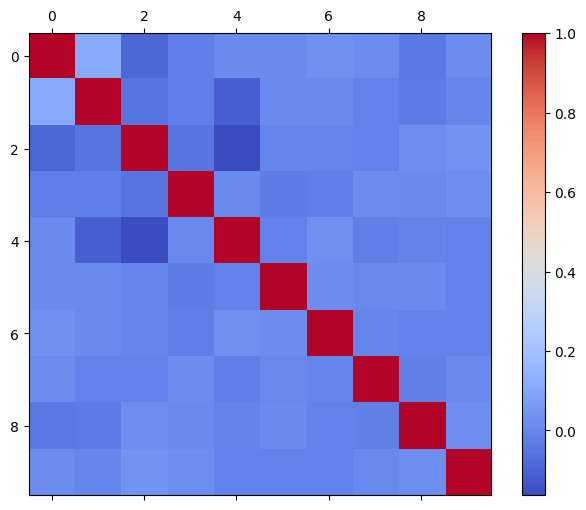

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.matshow(df.corr(), fignum=False, cmap='coolwarm')
plt.colorbar()
plt.show()


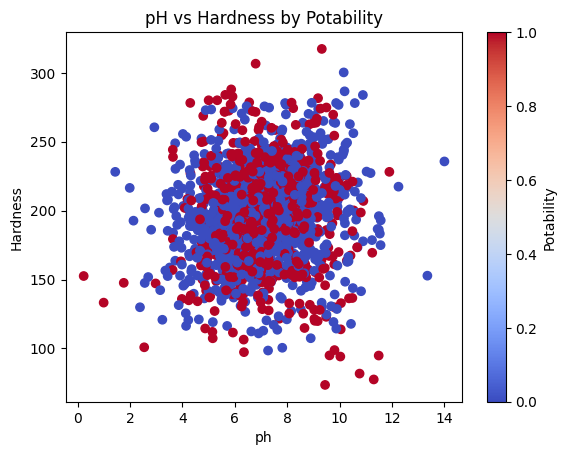

In [12]:
plt.scatter(df['ph'], df['Hardness'], c=df['Potability'], cmap='coolwarm')
plt.xlabel('ph')
plt.ylabel('Hardness')
plt.colorbar(label='Potability')
plt.title('pH vs Hardness by Potability')
plt.show()

**Data Splitting:**

In [13]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1608, 9)
X_test shape: (403, 9)
y_train shape: (1608,)
y_test shape: (403,)
